<a href="https://colab.research.google.com/github/Vishalbangari/France_dataset/blob/main/Copy_of_FRANCE_DATASET_1_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#read csv data from file into memory

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt #more data visualization
import warnings
warnings.filterwarnings('ignore') # ignore warnings
from scipy.stats import ttest_ind # useful for the t-test 
from subprocess import check_output 
plt.style.use('fivethirtyeight')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### DATE TIME CONVERSIONS

In [ ]:
france_w1 = pd.read_csv(r'/content/drive/MyDrive/France dataset/france_weather.csv')
france_w1.rename(columns={"Unnamed: 0": "Unnamed_0"}, inplace=True)


france_w1.head(10)

,Unnamed_0,Temperature,Wind_speed,Description,Weather,feels_like,name,temp_min,temp_max,pressure,humidity,visibility,sunrise,sunset,Date,Time
0,1,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1009,94,6000,1582093790,1582136891,19/2/20,4:14:12
1,6,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,19/2/20,4:24:12
2,11,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,19/2/20,4:34:12
3,16,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,19/2/20,4:44:12
4,21,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,19/2/20,4:54:13
5,26,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,19/2/20,5:04:12
6,31,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,19/2/20,5:14:13
7,36,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,19/2/20,5:24:12
8,41,301.15,2.1,clear sky,Clear,307.37,France,301.15,301.15,1008,94,6000,1582093790,1582136891,19/2/20,5:34:12
9,46,301.15,2.1,clear sky,Clear,307.37,France,301.15,301.15,1008,94,6000,1582093790,1582136891,19/2/20,5:44:12


In [ ]:
france_w1.Date

0       19/2/20
1       19/2/20
2       19/2/20
3       19/2/20
4       19/2/20
         ...   
7466    17/4/20
7467    17/4/20
7468    17/4/20
7469    17/4/20
7470    17/4/20
Name: Date, Length: 7471, dtype: object

In [ ]:
#  CHANGING DATE TO TIME

def change_into_datetime(col):
    france_w1[col] = pd.to_datetime(france_w1[col])

for i in ['Date', 'Time']:
    change_into_datetime(i)

france_w1['day'] = france_w1['Date'].dt.day
france_w1['month'] = france_w1['Date'].dt.month
france_w1['year'] = france_w1['Date'].dt.year

def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour

def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute
    
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)


extract_hour(france_w1,'Time')
extract_min(france_w1,'Time')
drop_column(france_w1,'Time')

In [ ]:
france_w1.head()

,Unnamed_0,Temperature,Wind_speed,Description,Weather,feels_like,name,temp_min,temp_max,pressure,humidity,visibility,sunrise,sunset,Date,day,month,year,Time_hour,Time_minute
0,1,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1009,94,6000,1582093790,1582136891,2020-02-19,19,2,2020,4,14
1,6,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,2020-02-19,19,2,2020,4,24
2,11,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,2020-02-19,19,2,2020,4,34
3,16,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,2020-02-19,19,2,2020,4,44
4,21,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,2020-02-19,19,2,2020,4,54


In [ ]:
france_w1.tail()

,Unnamed_0,Temperature,Wind_speed,Description,Weather,feels_like,name,temp_min,temp_max,pressure,humidity,visibility,sunrise,sunset,Date,day,month,year,Time_hour,Time_minute
7466,37748,302.15,6.7,few clouds,Clouds,304.40,France,302.15,302.15,1008,83,10000,1587103615,1587147692,2020-04-17,17,4,2020,18,4
7467,37750,302.15,6.7,few clouds,Clouds,304.40,France,302.15,302.15,1008,83,10000,1587103615,1587147692,2020-04-17,17,4,2020,18,14
7468,37752,302.15,6.2,few clouds,Clouds,304.22,France,302.15,302.15,1008,79,10000,1587103615,1587147692,2020-04-17,17,4,2020,18,24
7469,37754,302.15,6.2,few clouds,Clouds,304.22,France,302.15,302.15,1008,79,10000,1587103615,1587147692,2020-04-17,17,4,2020,18,34
7470,37756,302.15,6.2,few clouds,Clouds,304.22,France,302.15,302.15,1008,79,10000,1587103615,1587147692,2020-04-17,17,4,2020,18,44


In [ ]:
cat_col=[col for col in france_w1.columns if france_w1[col].dtype=='O']
cat_col

['Description', 'Weather', 'name']

In [ ]:
categorical=france_w1[cat_col]
categorical.head()

,Description,Weather,name
0,clear sky,Clear,France
1,clear sky,Clear,France
2,clear sky,Clear,France
3,clear sky,Clear,France
4,clear sky,Clear,France


In [ ]:
categorical['Description'].value_counts()

few clouds                      4160
scattered clouds                1467
broken clouds                    808
light rain                       294
clear sky                        230
thunderstorm                     207
overcast clouds                  190
moderate rain                     51
thunderstorm with light rain      40
mist                              12
thunderstorm with rain             9
thunderstorm with heavy rain       3
Name: Description, dtype: int64

In [ ]:
categorical['Weather'].value_counts()

Clouds          6625
Rain             345
Thunderstorm     259
Clear            230
Mist              12
Name: Weather, dtype: int64

In [ ]:
len(categorical['Description'].unique())

12

In [ ]:
# As Description is Nominal Categorical data we will perform OneHotEncoding
Description=pd.get_dummies(categorical['Description'], drop_first=True)
Description.head()

,clear sky,few clouds,light rain,mist,moderate rain,overcast clouds,scattered clouds,thunderstorm,thunderstorm with heavy rain,thunderstorm with light rain,thunderstorm with rain
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# As Weather is Nominal Categorical data we will perform OneHotEncoding
Weather=pd.get_dummies(categorical['Weather'], drop_first=True)
Weather.head()

,Clouds,Mist,Rain,Thunderstorm
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [ ]:
# As name is Nominal Categorical data we will perform OneHotEncoding
name=pd.get_dummies(categorical['name'], drop_first=True)
Weather.head()

,Clouds,Mist,Rain,Thunderstorm
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [ ]:
#now extract how many categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Description has total 12 categories 

Weather has total 5 categories 

name has total 1 categories 



In [ ]:
france_w1.head()

,Unnamed_0,Temperature,Wind_speed,Description,Weather,feels_like,name,temp_min,temp_max,pressure,humidity,visibility,sunrise,sunset,Date,day,month,year,Time_hour,Time_minute
0,1,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1009,94,6000,1582093790,1582136891,2020-02-19,19,2,2020,4,14
1,6,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,2020-02-19,19,2,2020,4,24
2,11,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,2020-02-19,19,2,2020,4,34
3,16,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,2020-02-19,19,2,2020,4,44
4,21,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,2020-02-19,19,2,2020,4,54


In [ ]:
france_w1.drop(labels= ["Unnamed_0",'Date'],axis =1 , inplace = True)

In [ ]:
france_w1.head()

,Temperature,Wind_speed,Description,Weather,feels_like,name,temp_min,temp_max,pressure,humidity,visibility,sunrise,sunset,day,month,year,Time_hour,Time_minute
0,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1009,94,6000,1582093790,1582136891,19,2,2020,4,14
1,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,24
2,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,34
3,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,44
4,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,54


In [ ]:
categorical.head()

,Description,Weather,name
0,clear sky,Clear,France
1,clear sky,Clear,France
2,clear sky,Clear,France
3,clear sky,Clear,France
4,clear sky,Clear,France


In [ ]:
france_w1[cat_col]

,Description,Weather,name
0,clear sky,Clear,France
1,clear sky,Clear,France
2,clear sky,Clear,France
3,clear sky,Clear,France
4,clear sky,Clear,France
...,...,...,...
7466,few clouds,Clouds,France
7467,few clouds,Clouds,France
7468,few clouds,Clouds,France
7469,few clouds,Clouds,France


In [ ]:
cont_col=[col for col in france_w1.columns if france_w1[col].dtype!='O']
cont_col

['Temperature',
 'Wind_speed',
 'feels_like',
 'temp_min',
 'temp_max',
 'pressure',
 'humidity',
 'visibility',
 'sunrise',
 'sunset',
 'day',
 'month',
 'year',
 'Time_hour',
 'Time_minute']

In [ ]:
france_w1[cont_col]

,Temperature,Wind_speed,feels_like,temp_min,temp_max,pressure,humidity,visibility,sunrise,sunset,day,month,year,Time_hour,Time_minute
0,301.15,2.6,307.02,301.15,301.15,1009,94,6000,1582093790,1582136891,19,2,2020,4,14
1,301.15,2.6,307.02,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,24
2,301.15,2.6,307.02,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,34
3,301.15,2.6,307.02,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,44
4,301.15,2.6,307.02,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7466,302.15,6.7,304.40,302.15,302.15,1008,83,10000,1587103615,1587147692,17,4,2020,18,4
7467,302.15,6.7,304.40,302.15,302.15,1008,83,10000,1587103615,1587147692,17,4,2020,18,14
7468,302.15,6.2,304.22,302.15,302.15,1008,79,10000,1587103615,1587147692,17,4,2020,18,24
7469,302.15,6.2,304.22,302.15,302.15,1008,79,10000,1587103615,1587147692,17,4,2020,18,34


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
categorical.columns

Index(['Description', 'Weather', 'name'], dtype='object')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = [data_france_w1.drop('Temperature',axis=1)]
y = ["tokyo", "tokyo", "paris"]
le.fit(X).transform(y)

In [ ]:
# Concatenate dataframe --> Description + Weather	 + name 

data_france_w1=pd.concat([Description,Weather	,name,france_w1[cont_col]],axis=1)
data_france_w1.head()

,clear sky,few clouds,light rain,mist,moderate rain,overcast clouds,scattered clouds,thunderstorm,thunderstorm with heavy rain,thunderstorm with light rain,thunderstorm with rain,Clouds,Mist,Rain,Thunderstorm,Temperature,Wind_speed,feels_like,temp_min,temp_max,pressure,humidity,visibility,sunrise,sunset,day,month,year,Time_hour,Time_minute
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,301.15,2.6,307.02,301.15,301.15,1009,94,6000,1582093790,1582136891,19,2,2020,4,14
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,301.15,2.6,307.02,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,24
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,301.15,2.6,307.02,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,34
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,301.15,2.6,307.02,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,44
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,301.15,2.6,307.02,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,54


In [ ]:
data_france_w1.shape

(7471, 30)

In [ ]:
data_france_w1.columns

Index(['clear sky', 'few clouds', 'light rain', 'mist', 'moderate rain',
       'overcast clouds', 'scattered clouds', 'thunderstorm',
       'thunderstorm with heavy rain', 'thunderstorm with light rain',
       'thunderstorm with rain', 'Clouds', 'Mist', 'Rain', 'Thunderstorm',
       'Temperature', 'Wind_speed', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'visibility', 'sunrise', 'sunset', 'day',
       'month', 'year', 'Time_hour', 'Time_minute'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()
  

data_france_w1['Temperature'] = label_encoder.fit_transform(data_france_w1['Temperature'])
  
data_france_w1['Temperature'].unique()

array([ 6,  7,  8,  9, 10, 11,  5,  4, 12,  3,  1,  2,  0])

outlier detection

In [ ]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

<Figure size 2160x1440 with 0 Axes>

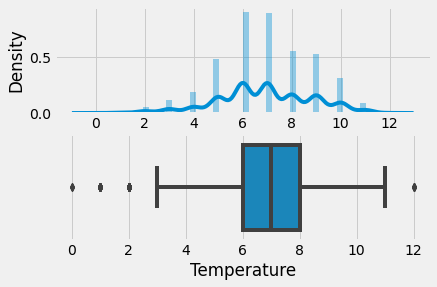

In [ ]:
plt.figure(figsize=(30,20))
plot(data_france_w1,'Temperature')

Dealing with Outliers

In [ ]:
data_france_w1['Temperature']=np.where(data_france_w1['Temperature']<=2,data_france_w1['Temperature'].median(),data_france_w1['Temperature'])

<Figure size 2160x1440 with 0 Axes>

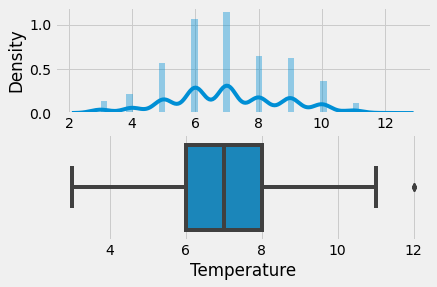

In [ ]:
plt.figure(figsize=(30,20))
plot(data_france_w1,'Temperature')

Separate your independent & dependent data

In [ ]:
X=data_france_w1.drop('Temperature',axis=1)
X.head()

,clear sky,few clouds,light rain,mist,moderate rain,overcast clouds,scattered clouds,thunderstorm,thunderstorm with heavy rain,thunderstorm with light rain,thunderstorm with rain,Clouds,Mist,Rain,Thunderstorm,Wind_speed,feels_like,temp_min,temp_max,pressure,humidity,visibility,sunrise,sunset,day,month,year,Time_hour,Time_minute
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.6,307.02,301.15,301.15,1009,94,6000,1582093790,1582136891,19,2,2020,4,14
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.6,307.02,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,24
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.6,307.02,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,34
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.6,307.02,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,44
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.6,307.02,301.15,301.15,1008,94,6000,1582093790,1582136891,19,2,2020,4,54


In [ ]:
X.shape

(7471, 29)

In [ ]:
np.array(X)

array([[1.00e+00, 0.00e+00, 0.00e+00, ..., 2.02e+03, 4.00e+00, 1.40e+01],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 2.02e+03, 4.00e+00, 2.40e+01],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 2.02e+03, 4.00e+00, 3.40e+01],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 2.02e+03, 1.80e+01, 2.40e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 2.02e+03, 1.80e+01, 3.40e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 2.02e+03, 1.80e+01, 4.40e+01]])

In [ ]:
y=data_france_w1['Temperature']
y

0       6.0
1       6.0
2       6.0
3       6.0
4       6.0
       ... 
7466    7.0
7467    7.0
7468    7.0
7469    7.0
7470    7.0
Name: Temperature, Length: 7471, dtype: float64

In [ ]:
np.array(y)

array([6., 6., 6., ..., 7., 7., 7.])

In [ ]:
y.shape

(7471,)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = [data_france_w1.drop('Temperature',axis=1)]
y = [data_france_w1['Temperature']]


In [ ]:
le.fit(X).transform(y)

ValueError: ignored

Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.

Why to apply Feature Selection?

To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features

I wanted to find mutual information scores or matrix to get to know about the relationship between all features.

Feature Selection using Information Gain,

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info_classif(X,y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

ValueError: ignored

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
france_w1 = pd.read_csv(r'/content/drive/MyDrive/France dataset/france_weather.csv')

france_w1

cat_features=[x for x in france_w1.columns if france_w1[x].dtype=="object"]

le=LabelEncoder()

for col in cat_features:
    if col in france_w1.columns:
        i = france_w1.columns.get_loc(col)
        france_w1.iloc[:,i] = france_w1.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [ ]:
france_w1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7471 non-null   int64  
 1   Temperature  7471 non-null   float64
 2   Wind_speed   7471 non-null   float64
 3   Description  7471 non-null   int64  
 4   Weather      7471 non-null   int64  
 5   feels_like   7471 non-null   float64
 6   name         7471 non-null   int64  
 7   temp_min     7471 non-null   float64
 8   temp_max     7471 non-null   float64
 9   pressure     7471 non-null   int64  
 10  humidity     7471 non-null   int64  
 11  visibility   7471 non-null   int64  
 12  sunrise      7471 non-null   int64  
 13  sunset       7471 non-null   int64  
 14  Date         7471 non-null   int64  
 15  Time         7471 non-null   int64  
dtypes: float64(5), int64(11)
memory usage: 934.0 KB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf = LinearRegression()
clf.fit(X_train, y_train)
print("LinearRegression")
print(clf.predict(X_test))

In [ ]:
clf = LinearRegression()
clf.fit(X_train, y_train)
print("LinearRegression")
print(clf.predict(X_train))

In [ ]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(X_train)

ValueError: ignored

In [ ]:
print(utils.multiclass.type_of_target(y_train.astype('int')))

multiclass


In [ ]:
print(utils.multiclass.type_of_target(y_test.astype('int')))

multiclass


In [ ]:
mutual_info_classif(X,y)

ValueError: ignored

In [ ]:
print(utils.multiclass.type_of_target(encoded))

In [ ]:
print(utils.multiclass.type_of_target(X_train.astype('int')))

In [ ]:
print(utils.multiclass.type_of_target(X_test.astype('int')))

In [ ]:
X_train = utils.multiclass.type_of_target(X_train.astype('int'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)